In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from wrangle import wrangle_grades

In [2]:
# plt.rc sets defaults for matplolin figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [3]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [6]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


## Continuous and Continuous

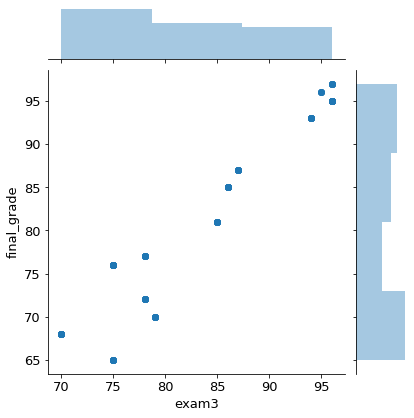

In [9]:
# jointplot: scatter plot + histogram
sns.jointplot(x='exam3', y='final_grade', data=train)

Thoughts: there is a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

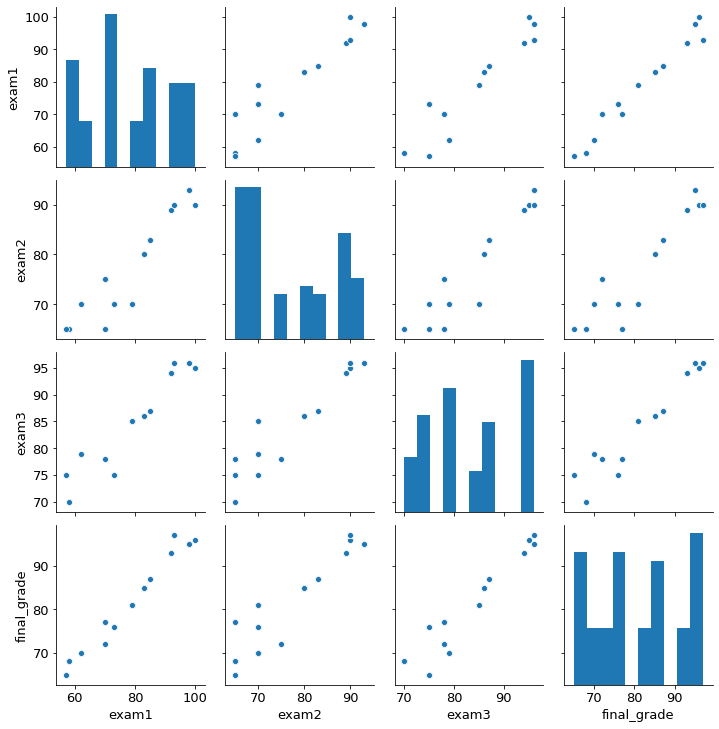

In [10]:
sns.pairplot(train)

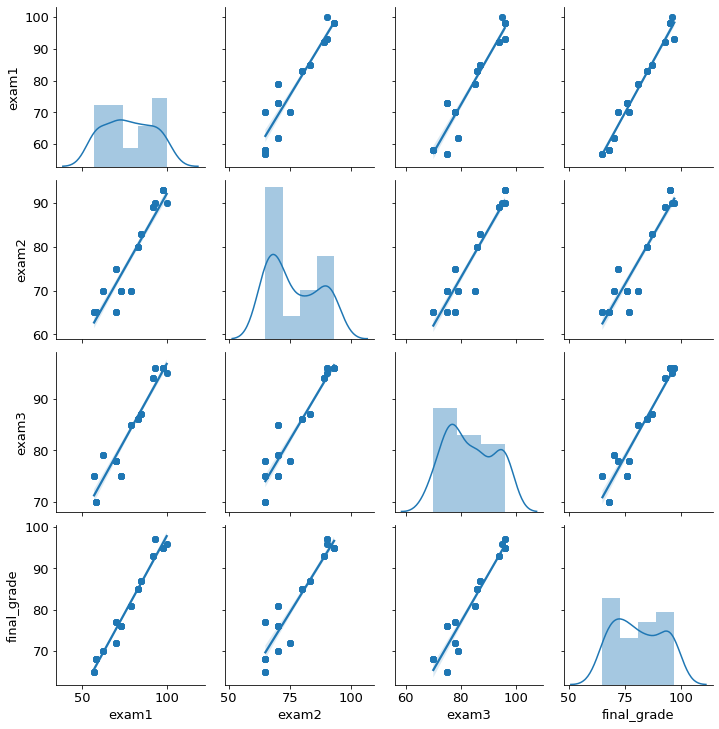

In [16]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of two variables

In [17]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


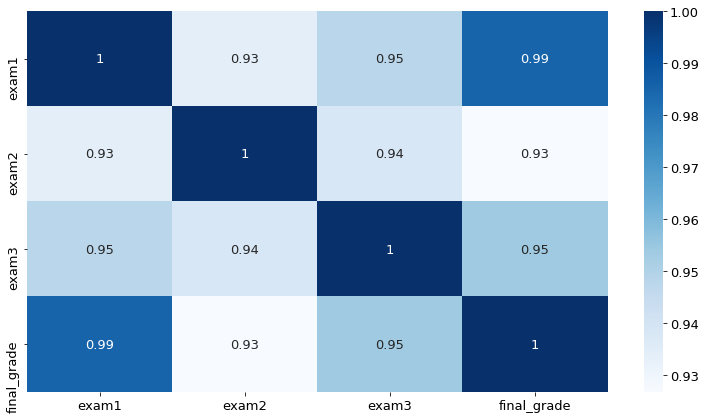

In [19]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:
- exam 2 has the least correlation with final grade
- exam 1 has the highest correlation with final grade

Questions:

- Why does exam 2 have a lower correlation?
    - students are slacking midsemester
    - the material covered on the final isn't the same as what is covered in exam 2
    - the material covered midsemester is harder

## Continuous and Categorical

In [26]:
# change to letter grades (categories) -- Series
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels=['D', 'C', 'B', 'A'])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz for continuous x categorical:
    
- boxplot
- bar chart
- violin
- swarmplot

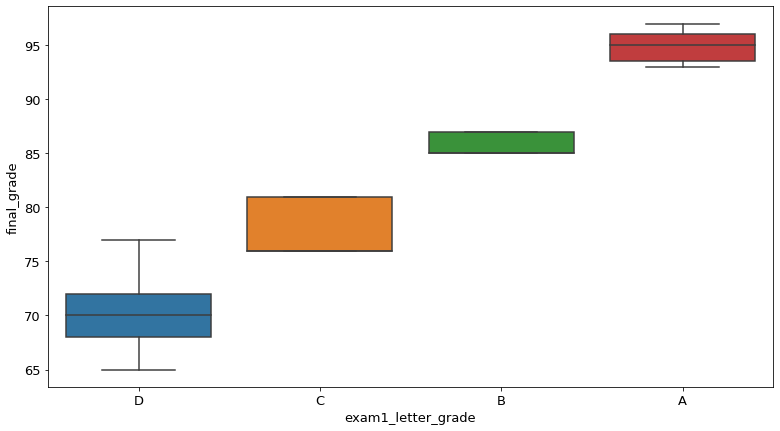

In [28]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:

- students with D's not only have the lowest grade, but alos the most variation in grades
    - maybe this is due to different study of habits or workflows?
- B's have the least variation
    - maybe because there's fewer observations in the B category

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

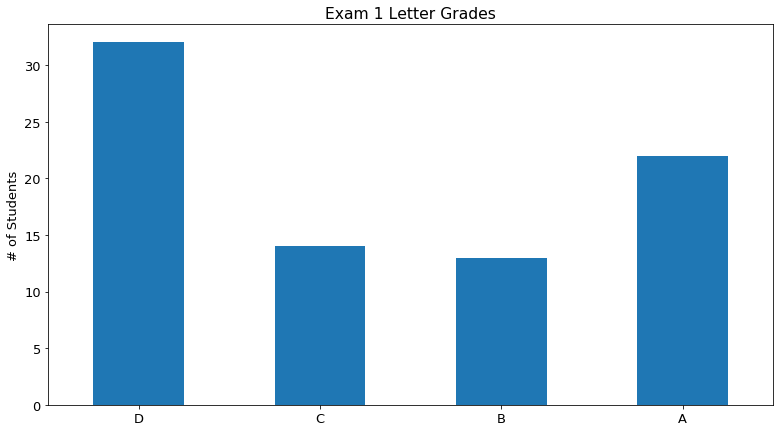

In [35]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar(ylabel='# of Students', title='Exam 1 Letter Grades')
plt.xticks(rotation=0)

Takeaways: there's not significantly fewer observations in the B category, maybe this subgroup is ripe for future research.

In [53]:
np.random.seed(13)
# make a fake category
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


(0, 100)

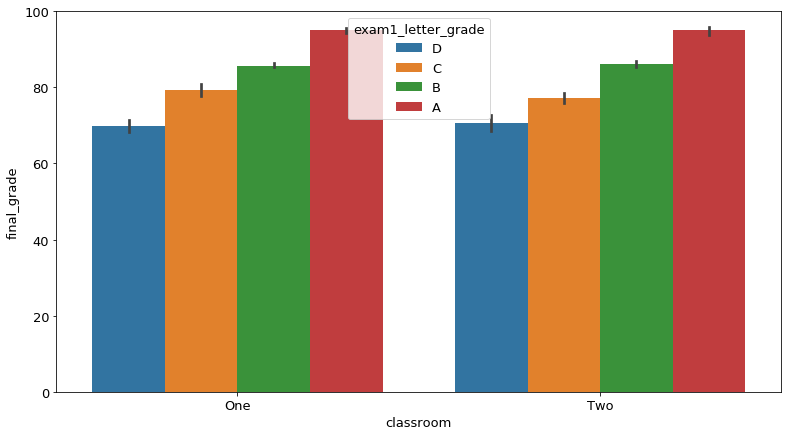

In [54]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0,100)

Takeaways: the distribution of grades in classroom one and two are about the same.

Classroom doesn't impact final grade? Let's run a hypothesis test to check.

- $H_0$: There is no difference in final grade between classroom one and two
- $H_a$: There is no difference in final grade between classroom one and two
- alpha = 0.05

In [55]:
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False,
)

Ttest_indResult(statistic=0.866735071416622, pvalue=0.3887772518573801)

Result: With a p-value of .025 we reject the null hypothesis that there is no difference in final grade between classroom one and two.

- p-value: 
    - P(data due to chance | $H_0$)
    - the likelihood of a false positive if the null hypothesis is true
- If we create a randomly chosen feature, we know that there is no relationship between it and the other features, however, die to chance, we will sometimes see a relationship
- Takeaways:
    - visualize, don't just test
    - statistical significance != business significance

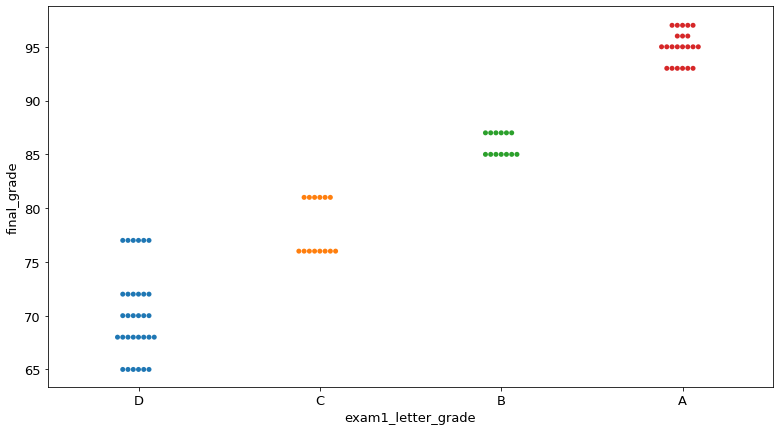

In [56]:
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

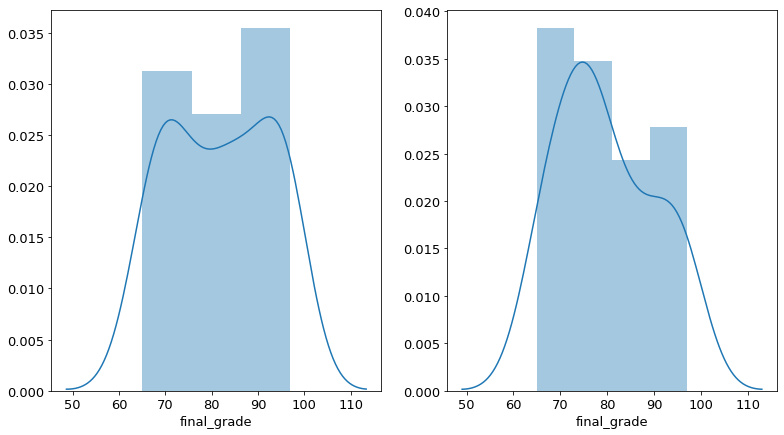

In [57]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

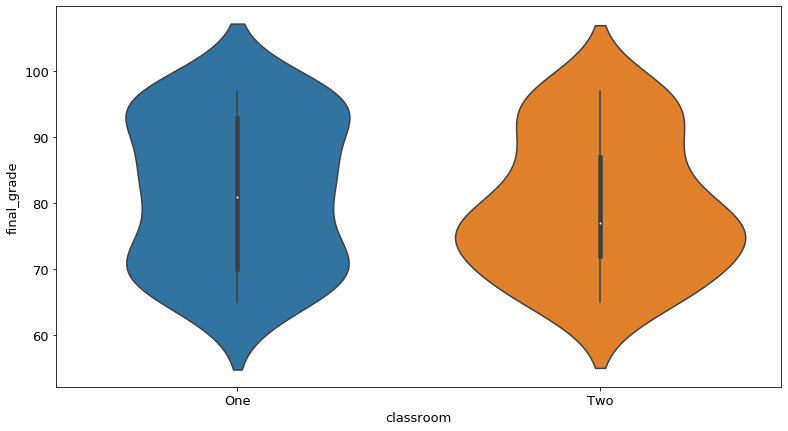

In [58]:
sns.violinplot(data=train, y='final_grade', x='classroom')

## Categorical and Categorical

In [59]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


In [65]:
# normalize lets us go from counts -> proportions
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)

classroom,One,Two
exam1_letter_grade,,
D,0.209877,0.185185
C,0.074074,0.098765
B,0.098765,0.061728
A,0.172840,0.098765


In [68]:
# better formatting
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
D,21.0%,18.5%
C,7.4%,9.9%
B,9.9%,6.2%
A,17.3%,9.9%


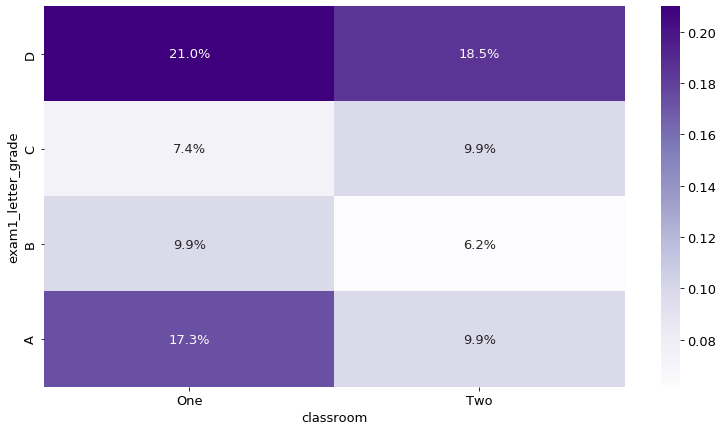

In [69]:
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [74]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns')

exam1_letter_grade,D,C,B,A
classroom,,,,
One,0.53125,0.428571,0.615385,0.636364
Two,0.46875,0.571429,0.384615,0.363636


- Normalize=True vs normalize='columns' or 'index'
- what percentage of observations fall into the intersection of these categories (normalize=True)
- of each subgroup, what percentage of observations fall into the other subgroup (normalize='columns' or 'index')